In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x=pd.read_csv("train.csv")
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
y=pd.read_csv("test.csv")
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
 y["PassengerId"].shape

(418,)

In [5]:
y_id=y["PassengerId"]
y_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [6]:
x.shape


(891, 12)

In [7]:
y.shape

(418, 11)

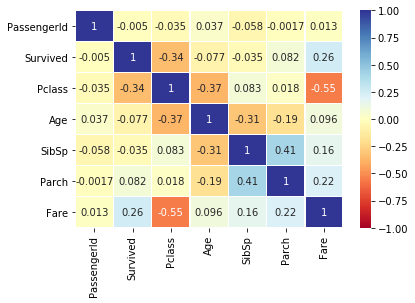

In [8]:
sns.heatmap(x.corr(),vmin=-1,vmax=1,annot=True,linewidths=.5,center=0,cmap="RdYlBu")

In [9]:
x.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

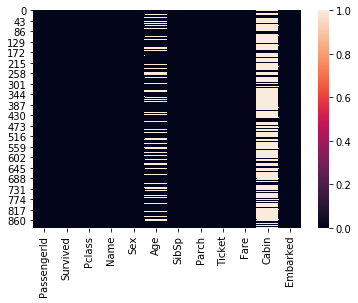

In [10]:
sns.heatmap(x.isnull())

In [11]:
print(x.isnull().sum(),x.shape,"\n"," -"*20," \n")
print(y.isnull().sum(),y.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 (891, 12) 
  - - - - - - - - - - - - - - - - - - - -  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 (418, 11)


In [12]:
not_imp=['PassengerId','Name','Ticket', 'Cabin', 'Embarked']

In [13]:
def drop_(df,columns):
        df.drop(columns=columns,inplace=True,axis=1)
        return df

In [14]:
x_target=x.Survived.values


In [15]:
x=drop_(x,not_imp)
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [16]:
x=drop_(x,"Survived")
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500


In [17]:
#y=drop_(y,not_imp)
y.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
x.Sex=pd.get_dummies(x.Sex,drop_first=True)
y.Sex=pd.get_dummies(y.Sex,drop_first=True)
print(x.head())
y.head()

   Pclass  Sex   Age  SibSp  Parch     Fare
0       3    1  22.0      1      0   7.2500
1       1    0  38.0      1      0  71.2833
2       3    0  26.0      0      0   7.9250
3       1    0  35.0      1      0  53.1000
4       3    1  35.0      0      0   8.0500


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
# checking balance inbalance
x_target=pd.Series(x_target)

In [20]:
x_target.value_counts()

0    549
1    342
dtype: int64

In [21]:
def fill_null(df):
    df=df.fillna(df.mean())
    print(df.isnull().sum())
    return df
#df.sex=df.sex.fillna(df.sex.mean())

In [22]:
x.Age=fill_null(x.Age)
y.Age=fill_null(y.Age)


0
0


In [23]:
x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [24]:
from sklearn.ensemble import voting
from sklearn.model_selection import train_test_split

C:\Users\HP\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.voting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [25]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [26]:
rfc=RandomForestClassifier(n_estimators=50,random_state=0)
dtc=DecisionTreeClassifier(random_state=0)
lr=LogisticRegression(random_state=0)
knnc=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()


In [27]:
models=[("rfc",rfc),("dtc",dtc),("lr",lr),("knnc",knnc),("scv",svc),("nb",nb)]
models

[('rfc',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=50,
                         n_jobs=None, oob_score=False, random_state=0, verbose=0,
                         warm_start=False)),
 ('dtc',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=0, sp

In [28]:
voting=VotingClassifier(models)

In [29]:
x_train,x_test,x_target_train,x_target_test=train_test_split(x,x_target,test_size=.25,
                                                             random_state=0)

In [30]:
voting.fit(x_train,x_target_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
       

In [31]:
x_pred=voting.predict(x_test)

In [32]:
x_target_test.head()

495    0
648    0
278    0
31     1
255    1
dtype: int64

In [33]:
accuracy_score(x_target_test,x_pred)

0.8295964125560538

In [34]:
voting.score(x_train,x_target_train)


0.8877245508982036

In [35]:
voting.estimators

[('rfc',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=50,
                         n_jobs=None, oob_score=False, random_state=0, verbose=0,
                         warm_start=False)),
 ('dtc',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=0, sp

In [36]:
y=drop_(y,not_imp)
y.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875


In [37]:
y.Fare=fill_null(y.Fare)
y.isnull().sum()

0


Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [38]:
y.shape

(418, 6)

In [39]:
y_pred=voting.predict(y)

In [40]:

y_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [41]:
type(y_id)

pandas.core.series.Series

In [42]:
type(y_pred)
y_pred=pd.Series(y_pred,name="Survived")
y_pred.head()

0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [43]:
result=pd.concat([y_id,y_pred],axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [49]:
result.to_csv("titanic_11may2020.csv",index=False)

In [52]:

pd.read_csv("titanic_11may2020.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
y_id.shape

(418,)

In [47]:
y_pred.shape

(418,)

In [48]:
result.shape

(418, 2)

### Kaggle Submission

17080
saurabhtripathi62
Saurabh Tripathi 
contributor tier
0.76555
3
now
Your Best Entry 
You advanced 1,918 places on the leaderboard!

Your submission scored 0.76555, which is an improvement of your previous score of 0.74641. Great job!
